In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']= 'True'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("data_HECN_f.xlsx")
data.head()

,Identity,%x,VEC,CEC,AEN,REN,E_f,r_crs,r_cov,r_ion,...,iDOS,H_v,B,G,G/B,E,B/G,Poission_Ratio,Formation_Enthalpy_80,Fracture Toughness
0,HECN 1,0.0,7.6,37.2,3.900,-1.200,-0.682109,1.176,2.500,0.896,...,-14.43796,13.281186,196.4,111.597206,0.568214,281.478321,1.759901,0.261135,-0.979211,2.272214
1,NaN,0.1,7.7,37.2,3.949,-1.249,-0.548079,1.173,2.495,0.893,...,-10.59945,15.170559,200.2,120.329215,0.601045,300.735738,1.663769,0.249637,-1.274350,2.378904
2,NaN,0.2,7.8,37.2,3.998,-1.298,-0.446018,1.170,2.490,0.890,...,-7.33237,15.002042,199.5,119.412904,0.598561,298.651643,1.670674,0.250500,-1.583274,2.362343
3,NaN,0.3,7.9,37.2,4.047,-1.347,-0.291239,1.167,2.485,0.887,...,-3.69572,17.991750,203.3,131.988249,0.649229,325.519239,1.540289,0.233137,-1.873382,2.504462
4,NaN,0.4,8.0,37.2,4.096,-1.396,0.002956,1.164,2.480,0.884,...,0.00000,19.233305,205.2,137.229718,0.668761,336.644312,1.495303,0.226572,-2.163912,2.561968


In [4]:
X = data.iloc[:, 2].values
Y = data.iloc[:, 18].values


In [5]:
print(Y)

[13.28118599 15.17055867 15.0020416  17.99175042 19.23330501 21.44502469
 20.01991598 21.18028051 18.57814394 19.85633782 18.73163948 21.22851876
 20.95935293 21.45465036 22.80119842 22.22982936 20.33669862 20.74757935
 19.2093203  18.13068876 16.859683   15.03615974 23.74666405 23.04512157
 19.98552501 19.66138287 19.36394819 19.42021271 18.40180737 17.2324926
 15.66617875 13.48179492 11.5945675  21.98922028 20.95347199 20.78291486
 19.26856377 17.57578784 17.64960228 14.95223786 12.34502876 10.12452928
  7.08700193  6.50593401 20.82375302 19.0576573  17.99784853 17.33807631
 13.45119251 12.32953092  9.72700816  9.72892143  8.45802273  8.66373493
  7.11379102]


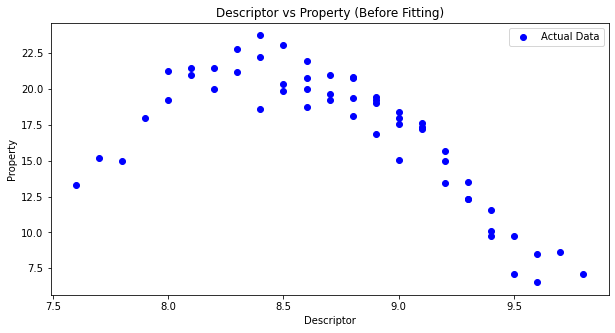

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.xlabel("Descriptor")
plt.ylabel("Property")
plt.title("Descriptor vs Property (Before Fitting)")
plt.legend()
plt.show()

In [7]:
coeffs = np.polyfit(X, Y, 3)

In [8]:
predicted_Y = np.polyval(coeffs, X)

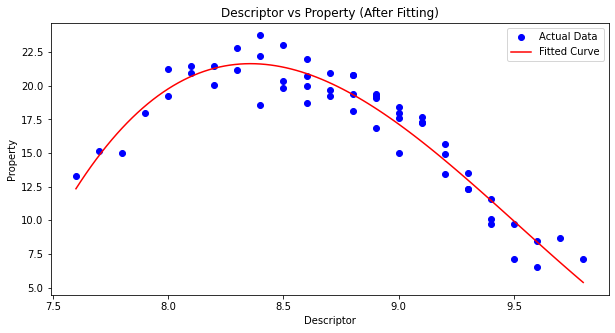

In [9]:
x_fit = np.linspace(min(X), max(X), 100)  # Smooth curve
y_fit = np.polyval(coeffs, x_fit)

plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color="blue", label="Actual Data")  # Raw data
plt.plot(x_fit, y_fit, color="red", label="Fitted Curve")  # Cubic fit
plt.xlabel("Descriptor")
plt.ylabel("Property")
plt.title("Descriptor vs Property (After Fitting)")
plt.legend()
plt.show()

In [10]:
#R2 value
from sklearn.metrics import r2_score
r2 = r2_score(Y, predicted_Y)

In [11]:
error_percent = np.abs((Y - predicted_Y) / Y) * 100

In [12]:
within_0_10_percent = np.sum(error_percent <= 10)

In [13]:
total_points = len(Y)

Regulation = (within_0_10_percent / total_points)*100



In [14]:
#Results
print(f"Cubic Polynomial Coefficients: {coeffs}")
print(f"R² Value: {r2:.4f}")
print(f"Number of data points with 0-10% error: {within_0_10_percent}")
print(f"Total data points: {total_points}")
print(f" Degree of Regulation: {Regulation:.4f}%") 

Cubic Polynomial Coefficients: [    3.83225922  -109.41228734  1025.77969269 -3146.19616885]
R² Value: 0.9194
Number of data points with 0-10% error: 44
Total data points: 55
 Degree of Regulation: 80.0000%
